# Let's explore EXFOR offerings for Ca48

In [1]:
import pickle
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

In [2]:
import exfor_tools
import jitr

Using database version x4i3_X4-2023-04-29 located in: /home/beyerk/mambaforge/envs/sage/lib/python3.11/site-packages/x4i3/data


In [3]:
proton = (1, 1)
neutron = (1, 0)

In [4]:
target =(122, 50)

In [5]:
all_entries_pp = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 1),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

In [6]:
# these are considered outliers or not useful
entries_to_ignore = ['F0930']
for entry in entries_to_ignore:
    del all_entries_pp[entry]

In [7]:
all_entries_pp

{}

In [8]:
for entry, data in all_entries_pp.items():

    N = len(data.measurements)
    if N < 10:
        fig, ax = plt.subplots(1, 1, figsize=(6, 2 * N))
        data.plot_experiment(
            ax,
            xlim=None,
            offsets=10,
            label_energy_err=False,
            label_hloc_deg=np.max(data.measurements[0].data[0, :]) * 0.9,
        )
        ax.set_title(f"{data.fancy_label} {entry}")
    else:
        N_plots = N // 10
        remaining = N % 10
        if remaining > 0:
            N_plots +=1
        for i in range(N_plots):
            fig, ax = plt.subplots(1, 1, figsize=(6, 20))
            data.plot_experiment(
                ax,
                data.measurements[i * N_plots: (i+1)*N_plots],
                xlim=None,
                offsets=10,
                label_energy_err=False,
                label_hloc_deg=np.max(data.measurements[0].data[0, :]) * 0.9,
            )
            ax.set_title(f"{data.fancy_label} {entry}")


In [9]:
all_entries_pp_ruth = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 1),
    quantity="dXS/dRuth",
    product="EL",
    energy_range=[10, 200],  # MeV
)

In [10]:
all_entries_pp_ruth

{'O0169': <exfor_tools.exfor_tools.ExforDifferentialData at 0x701edc742e10>,
 'O0788': <exfor_tools.exfor_tools.ExforDifferentialData at 0x701edc7bb590>}

In [11]:
# these are considered outliers or not useful
entries_to_ignore = []
for entry in entries_to_ignore:
    del all_entries_pp_ruth[entry]

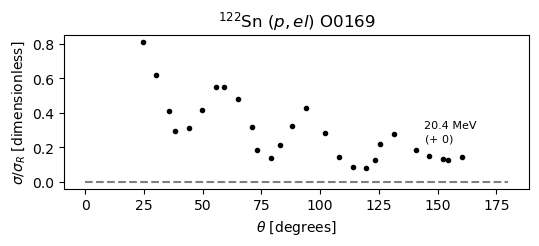

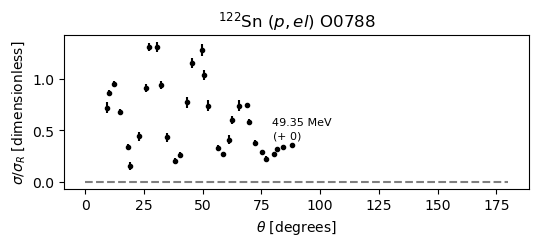

In [12]:
for entry, data in all_entries_pp_ruth.items():

    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2 * N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=2,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0, :]) * 0.9,
        label_offset_factor=0.1,
        log=False,
        add_baseline=True,
    )
    ax.set_title(f"{data.fancy_label} {entry}")

In [13]:
all_entries_nn = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 0),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

In [14]:
all_entries_nn

{'10817': <exfor_tools.exfor_tools.ExforDifferentialData at 0x701edc271290>}

In [16]:
# these are considered outliers or not useful
entries_to_ignore = []
for entry in entries_to_ignore:
    del all_entries_nn[entry]

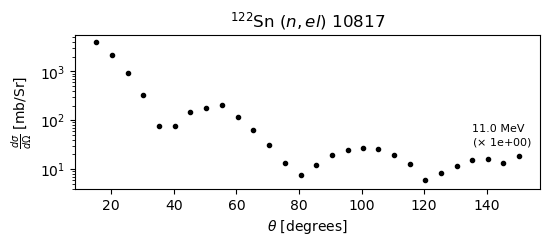

In [17]:
for entry, data in all_entries_nn.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=20,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
    )
    ax.set_title(f"{data.fancy_label} {entry}")